In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Izhikevich Spiking Model Neurons

$$v'=0.04v^{2}+5v+140-u+I$$
$$u'=a(bv-u)$$

if $v=30$ mV
then $v \leftarrow c ,\qquad u \leftarrow u+d$

In [125]:
types = ['regular spiking']
params = {
    'rs': np.array([0.02,0.2,-65, 8]),
    'ib' : np.array([0.02,0.2,-55, 4]),
    'ch' : np.array([0.02, 0.2, -50, 2]),
    'fs' : np.array([0.1, 0.2, -65, 2]),
    'tc1': np.array([0.02,0.25,-65, 0.05]),
    'tc2' : np.array([0.02,0.25,-65, 0.05]),
    'rz' : np.array([0.1, 0.25, -65, 2]),
    'lts' : np.array([0.02, 0.25, -65, 2])
}

In [126]:
for key in params:
    print(key)

rs
ib
ch
fs
tc1
tc2
rz
lts


In [127]:
def response(v, u, i, a, b, c, d):
    v_ = 0.04*v**2 + 5*v + 140 - u + i
    u_ = a*(b*v - u)

    if v+v_ >= 30:
        v = c
        u = u+d
    else:
        v = v + v_
        u = u + u_
    # print(v_, u_, params)
    return u, v

In [128]:
params['rs'][2]

np.float64(-65.0)

In [177]:
T = np.arange(0,300,1)
u = np.zeros((len(T),len(params)))
v = np.zeros((len(T),len(params)))
I = np.zeros(len(T))
I[10:] = 10
u[0,:] = -14
v[0,:] = -70

#special case thalamo-cortical
v[0,4] = -63
u[0,4] = -16
v[0,5] = -87
u[0,5] = -16

In [189]:
names = ['rs','ib','ch','fs','tc1','tc2','rz','lts']

for i,t in enumerate(T[:-1]):
    for j,name in enumerate(names):
        if name =='tc2':
            I = I-10
        if name =='tc1':
            I = I/2
        if name =='rz':
            I = I/2
        u[i+1,j], v[i+1,j] = response(v[i,j], u[i,j], I[i], *params[name])
        if name =='tc2':
            I = I+10
        if name =='tc1':
            I = I*2
        if name =='rz':
            I = I*2

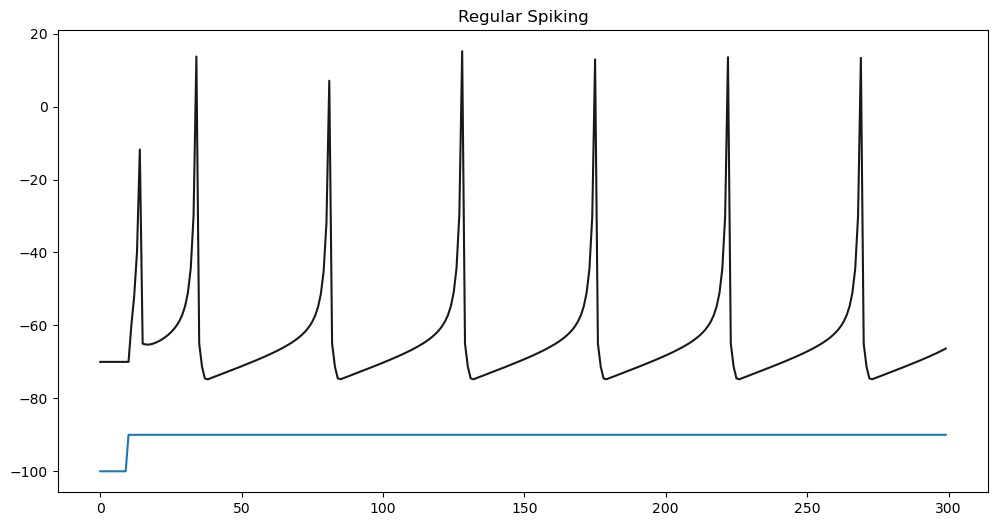

-18.618891266945894 -64.41391109256088 -13.521178002359932 -16.103477773160503


In [184]:
plt.figure(figsize=(12,6))
plt.plot(T,v[:,0],c='black',alpha=0.9)
# plt.plot(T,u,alpha=0.5)
plt.plot(T,I-100)
plt.title('Regular Spiking')
plt.show()

print(v[-1,4],v[-1,5],u[-1,4],u[-1,5])

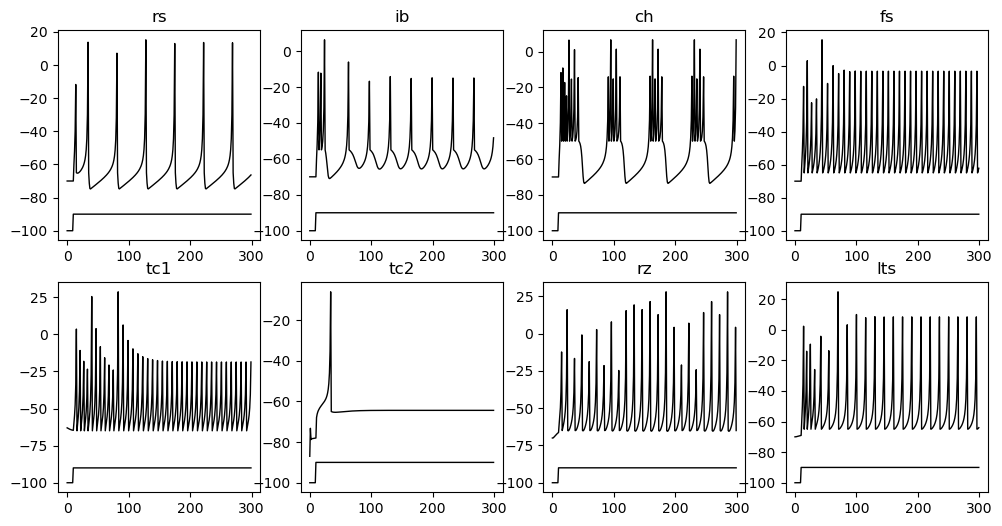

In [190]:
fig, ax = plt.subplots(2,4,figsize=(12,6))
for l,ax_ in enumerate(ax.flatten()): 
    ax_.plot(T,v[:,l],c='black',alpha=1,linewidth=1)
    ax_.plot(T,I-100,c='black',alpha=1,linewidth=1)
    ax_.set_title(names[l])